## Lab: Using Callbacks

In [ ]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print ('tensorflow version:', tf.__version__)
print (tf.config.experimental.list_physical_devices())

# number formats
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

tensorflow version: 2.3.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## TF-GPU Debug
The following block tests if TF is running on GPU.

In [3]:
## This block is to tweak TF running on GPU
## You may comment this out, if you are not using GPU

## ---- start Memory setting ----
## Ask TF not to allocate all GPU memory at once.. allocate as needed
## Without this the execution will fail with "failed to initialize algorithm" error

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)
## ---- end Memory setting ----


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5



In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Step 1 : Read Data & Shape Data

In [5]:
import os

# data_location_local = '../data/iris/keras/iris.csv'

data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"
data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location)
iris = pd.read_csv(data_location_local)

iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array


from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 


8192/4612 [=====================================================] - 0s 0us/step


/home/sujee/anaconda3/envs/tf-2.3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Step 2 : Build the Model


In [6]:
def build_model():
    input_dim = len(input_columns)
    output_clases = 3 
#     print ("input_dim : ", input_dim, ", output classes : ", output_clases)

    model = tf.keras.Sequential([
                tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_dim=input_dim),
                tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
                tf.keras.layers.Dense(units=output_clases,  activation=tf.nn.softmax)
                ])

    # loss = 'sparse_categorical_crossentropy'  or 'categorical_crossentropy'
    model.compile(loss='sparse_categorical_crossentropy', 
                     optimizer='adam', metrics=['accuracy'])
    # print (model.summary())
    # tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
    return model



## Step  : Train Without Any Callbacks

training starting ...
Epoch 1/100
3/3 [==============================] - 0s 29ms/step - loss: 1.1499 - accuracy: 0.7188 - val_loss: 1.4165 - val_accuracy: 0.5417
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0111 - accuracy: 0.7292 - val_loss: 1.2498 - val_accuracy: 0.5417
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8996 - accuracy: 0.7292 - val_loss: 1.0761 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8123 - accuracy: 0.7292 - val_loss: 0.9526 - val_accuracy: 0.5417
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7518 - accuracy: 0.7292 - val_loss: 0.8653 - val_accuracy: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7137 - accuracy: 0.7604 - val_loss: 0.7997 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.7917 - val_loss: 0.7627 - val_accuracy: 0.6667
Epoc

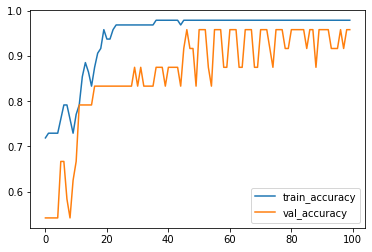

CPU times: user 2.26 s, sys: 225 ms, total: 2.49 s
Wall time: 2.06 s


In [7]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
## compile resets the model
model = build_model()

epochs = 100 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1)

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step: Use Early Stopping Callback

- How many epochs is the training running for?
- What is the final accuracy?
- Play with the patience value to achieve deisred accuracy

In [8]:
cb_early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.1, patience=10)

training starting ...
Epoch 1/500
3/3 [==============================] - 0s 25ms/step - loss: 2.9797 - accuracy: 0.2708 - val_loss: 1.8908 - val_accuracy: 0.4583
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 2.2292 - accuracy: 0.2708 - val_loss: 1.4815 - val_accuracy: 0.4583
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 1.7122 - accuracy: 0.2708 - val_loss: 1.2455 - val_accuracy: 0.4583
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 1.3498 - accuracy: 0.5312 - val_loss: 1.1435 - val_accuracy: 0.5833
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 1.1530 - accuracy: 0.4375 - val_loss: 1.1175 - val_accuracy: 0.2500
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 1.0522 - accuracy: 0.3854 - val_loss: 1.1249 - val_accuracy: 0.4167
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 1.0219 - accuracy: 0.6875 - val_loss: 1.1454 - val_accuracy: 0.4583
Epoc

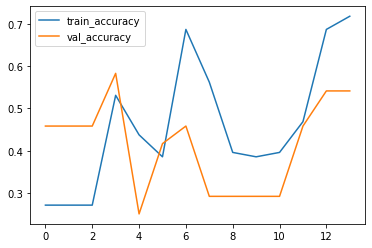

CPU times: user 585 ms, sys: 32.7 ms, total: 618 ms
Wall time: 552 ms


In [9]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [cb_early_stop])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step : Implementing Custom Callback
In this section we are going to implement a custom call back to stop training when 80% accuracy is reached.


In [10]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    print ('\nMyCallback: on_epoch_end(), epoch={}, got logs: {}'.format(epoch, logs))
    if(logs.get('val_accuracy') > 0.8):
      print("\nMyCallback: Reached 80% accuracy so stopping training!")
      self.model.stop_training = True

training starting ...
Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0838 - accuracy: 0.1875
MyCallback: on_epoch_end(), epoch=0, got logs: {'loss': 1.065107822418213, 'accuracy': 0.40625, 'val_loss': 1.0893727540969849, 'val_accuracy': 0.375}
3/3 [==============================] - 0s 46ms/step - loss: 1.0651 - accuracy: 0.4062 - val_loss: 1.0894 - val_accuracy: 0.3750
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0406 - accuracy: 0.3750
MyCallback: on_epoch_end(), epoch=1, got logs: {'loss': 0.9819858074188232, 'accuracy': 0.4270833432674408, 'val_loss': 1.0261343717575073, 'val_accuracy': 0.375}
3/3 [==============================] - 0s 4ms/step - loss: 0.9820 - accuracy: 0.4271 - val_loss: 1.0261 - val_accuracy: 0.3750
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 0.8959 - accuracy: 0.4688
MyCallback: on_epoch_end(), epoch=2, got logs: {'loss': 0.9172551035881042, 'accuracy': 0.4583333432674408, 'val_loss': 0.97621518

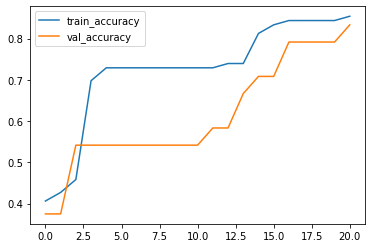

CPU times: user 799 ms, sys: 34.3 ms, total: 833 ms
Wall time: 726 ms


In [11]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [MyCallback()])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 5 : Add Multiple Callbacks
In this lab, we will add tensorboard and our custom call back

In [12]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'callback1'
tb_top_level_dir= '/tmp/tensorboard-logs'
tb_app_dir = os.path.join (tb_top_level_dir, app_name)
tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))
print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/callback1/23-59-09


training starting ...
Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 1.3868 - accuracy: 0.4062WARNING:tensorflow:From /home/sujee/anaconda3/envs/tf-2.3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.

MyCallback: on_epoch_end(), epoch=0, got logs: {'loss': 1.3907698392868042, 'accuracy': 0.3854166567325592, 'val_loss': 1.5357681512832642, 'val_accuracy': 0.2916666567325592}
3/3 [==============================] - 0s 32ms/step - loss: 1.3908 - accuracy: 0.3854 - val_loss: 1.5358 - val_accuracy: 0.2917
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 1.4147 - accuracy: 0.3438
MyCallback: on_epoch_end(), epoch=1, got logs: {'loss': 1.277220368385315, 'accuracy': 0.3854166567325592, 'val_loss': 1.4193229675292969, 'val_accuracy': 0.2916666567325592}
3/3 [=======

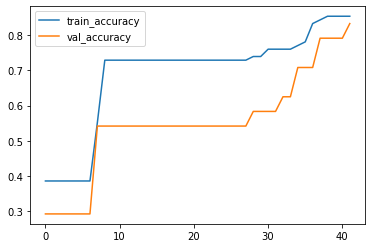

CPU times: user 1.31 s, sys: 74.6 ms, total: 1.38 s
Wall time: 1.15 s


In [13]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [MyCallback(), tensorboard_callback])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()